In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 20

In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

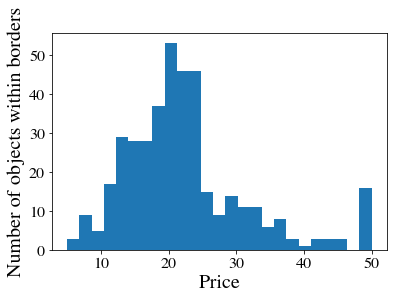

In [3]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

29.34684426408944


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

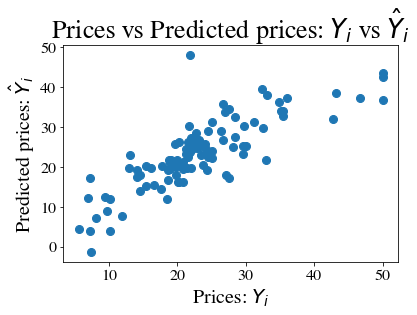

In [5]:
test_indices = np.random.choice(np.arange(X_train.shape[0]), 
size=50, replace=False)

lm = LinearRegression()
lm.fit(X_train[test_indices], y_train[test_indices])

y_pred = lm.predict(X_test)

print(mean_squared_error(y_test,y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Построим необходимые графики

In [6]:
min_amount = 30
err_array = np.zeros(50)
err_graph = np.zeros((X_train.shape[0]-min_amount,2))

In [12]:
for indeces in range(min_amount,X_train.shape[0]):
    for i in range(50):
        test_indices = np.random.choice(np.arange(X_train.shape[0]), 
        size=indeces, replace=False)

        lm = LinearRegression()
        lm.fit(X_train[test_indices], y_train[test_indices])

        y_pred = lm.predict(X_test)

        err_array[i] = mean_squared_error(y_test,y_pred)
    err_graph[indeces-min_amount][0] = np.mean(err_array)
    err_graph[indeces-min_amount][1] = np.std(err_array)


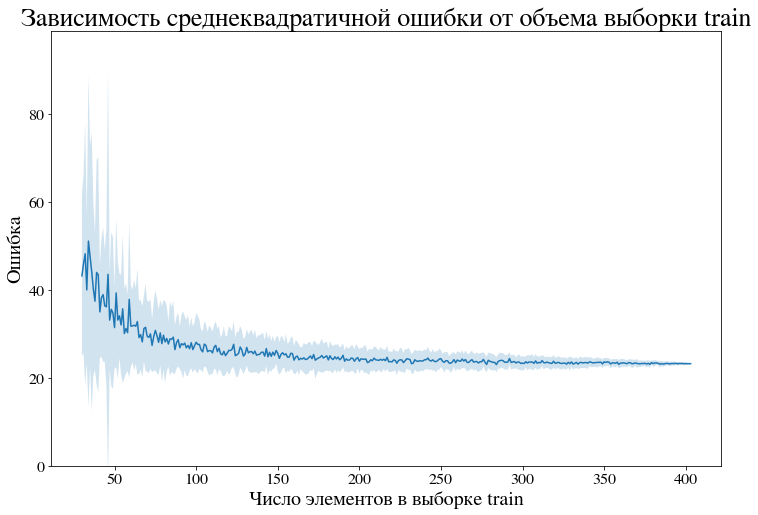

In [22]:
x_array = np.arange(min_amount, X_train.shape[0])
fig, axis = plt.subplots(figsize=(12, 8))
axis.plot(x_array,err_graph[:,0])
axis.fill_between(x_array, err_graph[:,0] - err_graph[:,1],
                err_graph[:,0] + err_graph[:,1], alpha=0.2)
axis.set_ylim(0,99)
axis.set_xlabel('Число элементов в выборке train')
axis.set_ylabel('Ошибка')
axis.set_title('Зависимость среднеквадратичной ошибки от объема выборки train')
plt.show()
fig.savefig('plot.png')

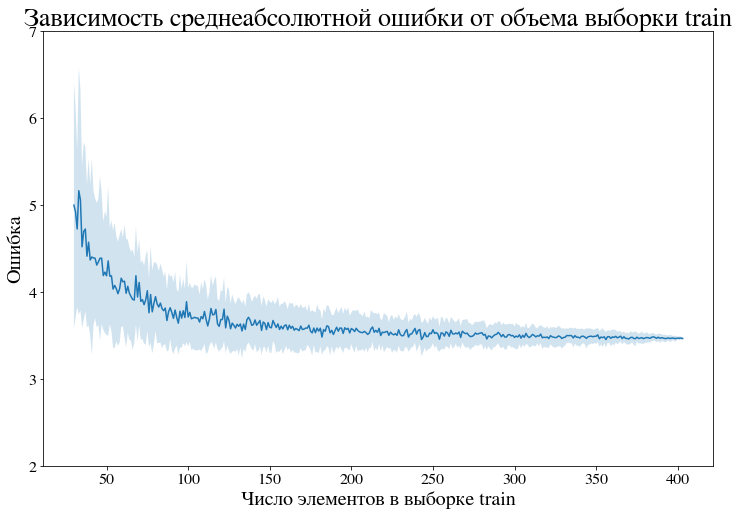

In [9]:
for indeces in range(min_amount,X_train.shape[0]):
    for i in range(50):
        test_indices = np.random.choice(np.arange(X_train.shape[0]), 
        size=indeces, replace=False)

        lm = LinearRegression()
        lm.fit(X_train[test_indices], y_train[test_indices])

        y_pred = lm.predict(X_test)

        err_array[i] = mean_absolute_error(y_test,y_pred)
    err_graph[indeces-min_amount][0] = np.mean(err_array)
    err_graph[indeces-min_amount][1] = np.std(err_array)

x_array = np.arange(min_amount, X_train.shape[0])
fig, axis = plt.subplots(figsize=(12, 8))
axis.plot(x_array,err_graph[:,0])
axis.fill_between(x_array, err_graph[:,0] - err_graph[:,1],
                err_graph[:,0] + err_graph[:,1], alpha=0.2)
axis.set_ylim(2,7)
axis.set_xlabel('Число элементов в выборке train')
axis.set_ylabel('Ошибка')
axis.set_title('Зависимость среднеабсолютной ошибки от объема выборки train')
plt.show()
fig.savefig('plot.png')

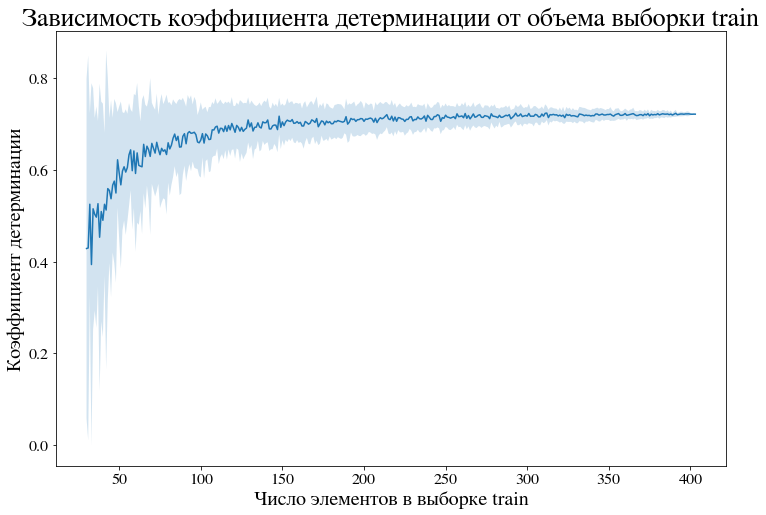

In [10]:
for indeces in range(min_amount,X_train.shape[0]):
    for i in range(50):
        test_indices = np.random.choice(np.arange(X_train.shape[0]), 
        size=indeces, replace=False)

        lm = LinearRegression()
        lm.fit(X_train[test_indices], y_train[test_indices])

        y_pred = lm.predict(X_test)

        err_array[i] = r2_score(y_test,y_pred)
    err_graph[indeces-min_amount][0] = np.mean(err_array)
    err_graph[indeces-min_amount][1] = np.std(err_array)

x_array = np.arange(min_amount, X_train.shape[0])
fig, axis = plt.subplots(figsize=(12, 8))
axis.plot(x_array,err_graph[:,0])
axis.fill_between(x_array, err_graph[:,0] - err_graph[:,1],
                err_graph[:,0] + err_graph[:,1], alpha=0.2)

axis.set_xlabel('Число элементов в выборке train')
axis.set_ylabel('Коэффициент детерминации')
axis.set_title('Зависимость коэффициента детерминации от объема выборки train')
plt.show()
fig.savefig('plot.png')

## Вывод

Как видно, дисперсия среднеквадратичной и среднеабсолютной ошибок очень медленно убывает, следовательно, даже при большой тестовой выборке(в 3 раза превышающей тест) результат очень сильно зависит от подвыборки. Также эксперимент демонстрирует, что точно не стоит брать тренировочную выборку меньше тестовой.